# **Bank Marketing Campaign : EDA and Classification**

## <font color= steelblue>1. Introduction:<font>

### <font color= indigo>Problem Statement:<font>
Find the best strategies to improve for the next marketing campaign. How can the financial institution have a greater effectiveness for future marketing campaigns? In order to answer this, we have to analyze the last marketing campaign the bank performed and identify the patterns that will help us find conclusions in order to develop future strategies and predict which customer has deposits or the probability of making deposits.

**What is a deposit?**

Deposit is the money deposited to banks and similar credit institutions to be withdrawn when requested or at the end of a certain maturity or notice period.
___________________________________________________________________________________________________________________

## <font color= steelblue>2. Getting Jupyter Ready:<font>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from scipy import stats
from scipy.stats import f_oneway

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,roc_auc_score,classification_report,confusion_matrix,roc_curve,plot_precision_recall_curve
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectFpr, chi2, f_classif

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from xgboost import XGBClassifier
from sklearn.svm import SVC

import optuna 
from optuna import Trial, visualization
from optuna.samplers import TPESampler

import time
from warnings import filterwarnings
filterwarnings('ignore')

## <font color= steelblue>3. Data overview:<font>

In [2]:
##Importing Dataset
data = pd.read_csv("bank.csv")
df = data.copy()
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


### <font color= indigo> Columns Description
<table>
    <tr>
        <td><b>Feature</b></td>
        <td><b>Defination</b></td>
        <td><b>Type</b></td>
    </tr>
    <tr>
        <td>Age</td>
        <td>Customer's age</td>
        <td>Numeric: '59','34','32'</td>
    </tr>
    <tr>
        <td>Job</td>
        <td>Customer's job</td>
        <td>Categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired'..)</td>
    </tr>
    <tr>
        <td>Marital</td>
        <td>Customer's marital status</td>
        <td>Categorical: 'divorced','married','single','unknown'</td>
    </tr>
    <tr>
        <td>Education</td>
        <td>Customer education level</td>
        <td>Categorical: 'primary', 'secondary', 'tertiary' ve 'unknown'</td>
    </tr>
    <tr>
        <td>Default</td>
        <td>Does the customer already have a loan?</td>
        <td>Categorical: 'no','yes'</td>
    </tr>
    <tr>
        <td>Housing</td>
        <td>Does the client have a home loan?</td>
        <td>Categorical: 'no','yes'</td>
    </tr>
    <tr>
        <td>Loan</td>
        <td>Does the customer have a personal loan?</td>
        <td>Categorical: 'no','yes'</td>
    </tr>
    <tr>
        <td>Balance</td>
        <td>Customer's individual balance</td>
        <td>Numeric: '1270','2343','45'</td>
    </tr>
    <tr>
        <td>Contact</td>
        <td>Customer's contact type</td>
        <td>Categorical: 'cellular','telephone','unknown'</td>
    </tr>
    <tr>
        <td>Month</td>
        <td>Last contact month of the year</td>
        <td>Categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'</td>
    </tr>
    <tr>
        <td>Day</td>
        <td>Last contact day of the week</td>
        <td></td>
    </tr>
    <tr>
        <td>Duration</td>
        <td>Last contact time, in seconds</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>Campaign</td>
        <td>Number of contacts performed during this campaign and for this customer</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>Pdays</td>
        <td>Number of days since the customer was last contacted from a previous campaign</td>
        <td>Numeric (probably -1 means the customer has not been contacted before)</td>
    </tr>
    <tr>
        <td>Previous</td>
        <td>Number of contacts performed before this campaign and for this customer</td>
        <td>Numeric</td>
    </tr>
    <tr>
        <td>Poutcome</td>
        <td>Result of previous marketing campaign</td>
        <td>Categorical: 'failure','nonexistent','success','other'</td>
    </tr>
    <tr>
        <td>Deposit&nbsp;</td>
        <td>Has the customer subscribed to a time deposit?</td>
        <td>Binary: 'yes','no'</td>
    </tr>
</table>

### <font color= indigo>Descriptive Statistics

In [3]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> - In the age variable, it is seen that 50% of the data is distributed between 32-49. The max value is much higher than the top quartile. In this case, we can say that the age variable has a right skewed distribution.

<font color= darkcyan> - The balance variable shows a very high standard deviation. In other words, we can say that the data points show a wide spread. It is seen that Mean and Median and Min-Max values show a distant attitude from each other. It can be predicted that the data is not normally distributed and there may be outliers (scaling can be done with a min-max scaler).

### <font color= indigo>Missing Value Check

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There is no missing value in the data set. If there were missing values, we would have to fill them with the median, mean or mode (in some cases the data could be deleted) according to the data set.


## <font color= steelblue>4. Exploratory Data Analysis:<font>

### <font color= indigo>Distribution of Numeric Variables

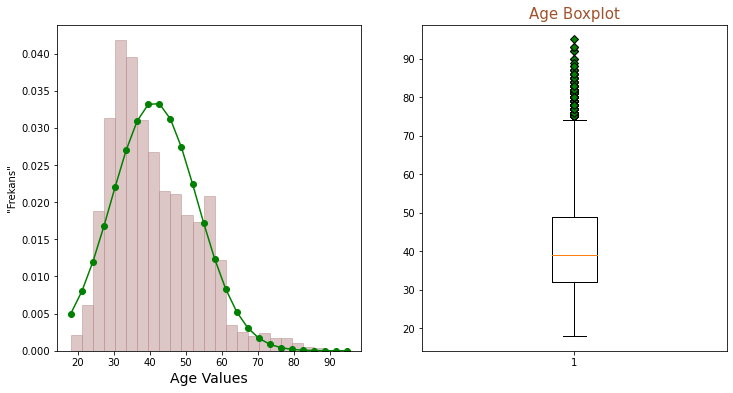

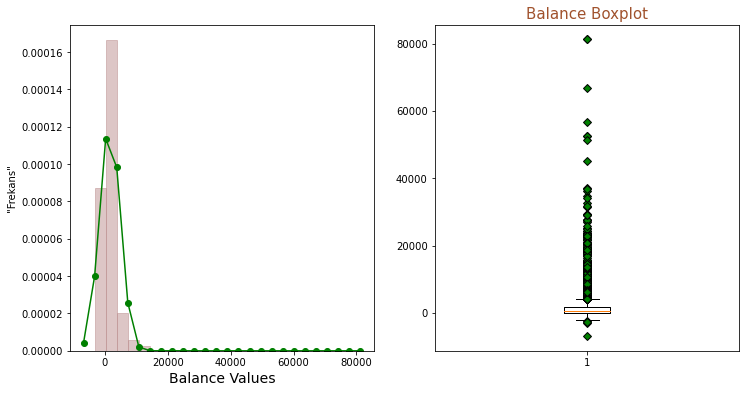

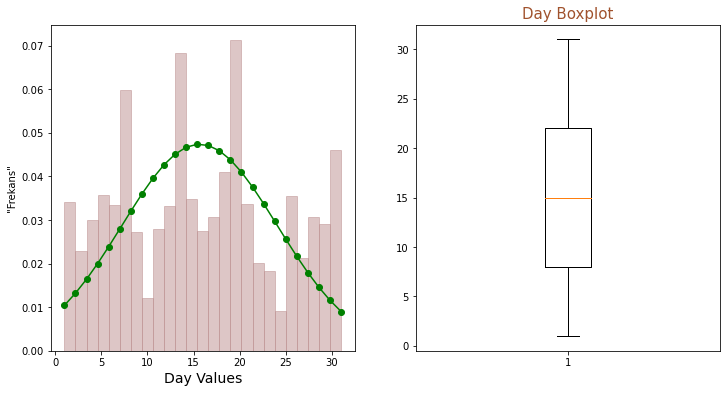

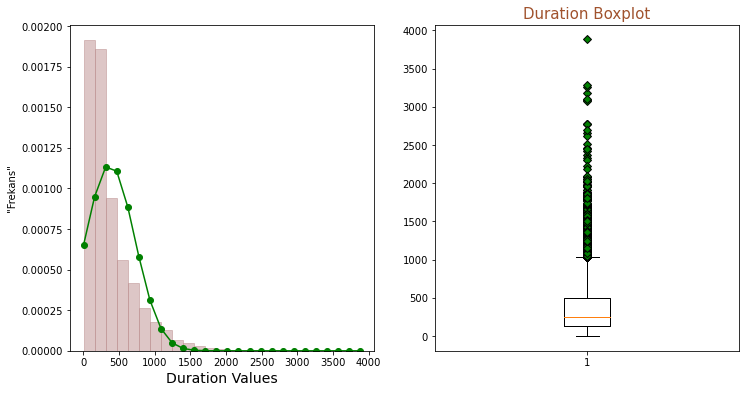

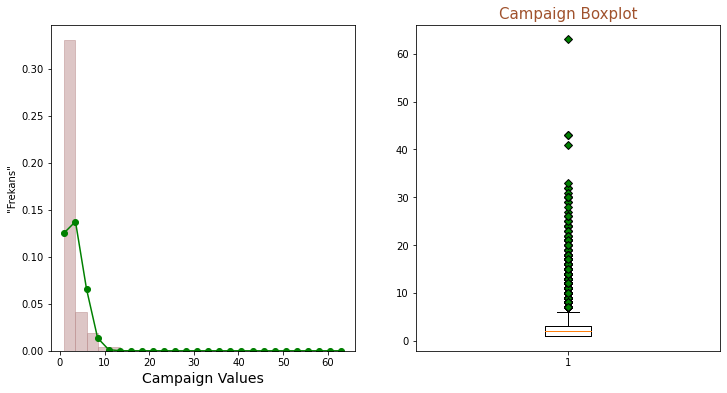

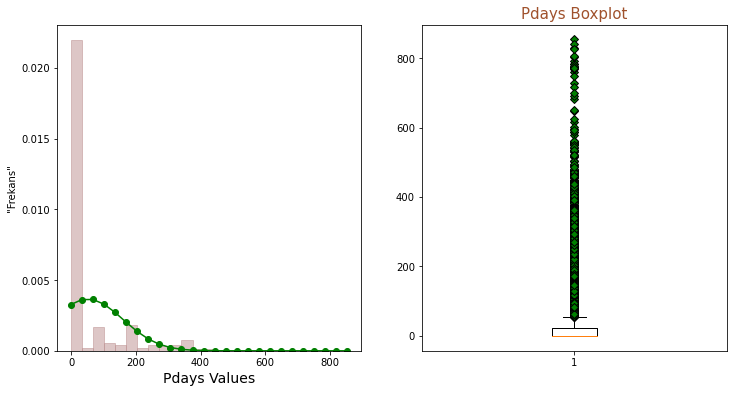

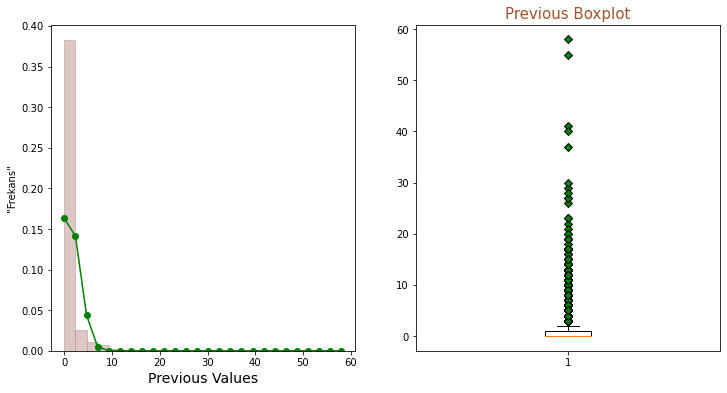

In [5]:
selectColumns = list(data.select_dtypes(include='int64'))

for column in selectColumns:

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # Distribution Num. Feature
    _, bins, _ = ax1.hist(data[column], bins = 25,
                          density = 1, alpha = 0.5,
                          color = 'rosybrown',
                          ec= 'rosybrown' )

    mu, sigma = stats.norm.fit(data[column])
    best_fit_line = stats.norm.pdf(bins, mu, sigma)

    ax1.plot(bins, best_fit_line, 'g-o')

    ax1.set_ylabel('"Frekans"')
    ax1.set_xlabel(column.capitalize() + " Values",fontsize=14)

    # Boxplot
    green_diamond = dict(markerfacecolor='g', marker='D')
    ax2.boxplot(data[column],flierprops=green_diamond)

    ax2.set_title(column.capitalize() + " Boxplot",
                  fontdict=dict(
                  family="DejaVu Sans",
                  size=15,
                  color="sienna"))
    plt.show()

At first glance, we can predict that the features do not fit the normal distribution.

### <font color= indigo>Relationship Between Numeric Variables

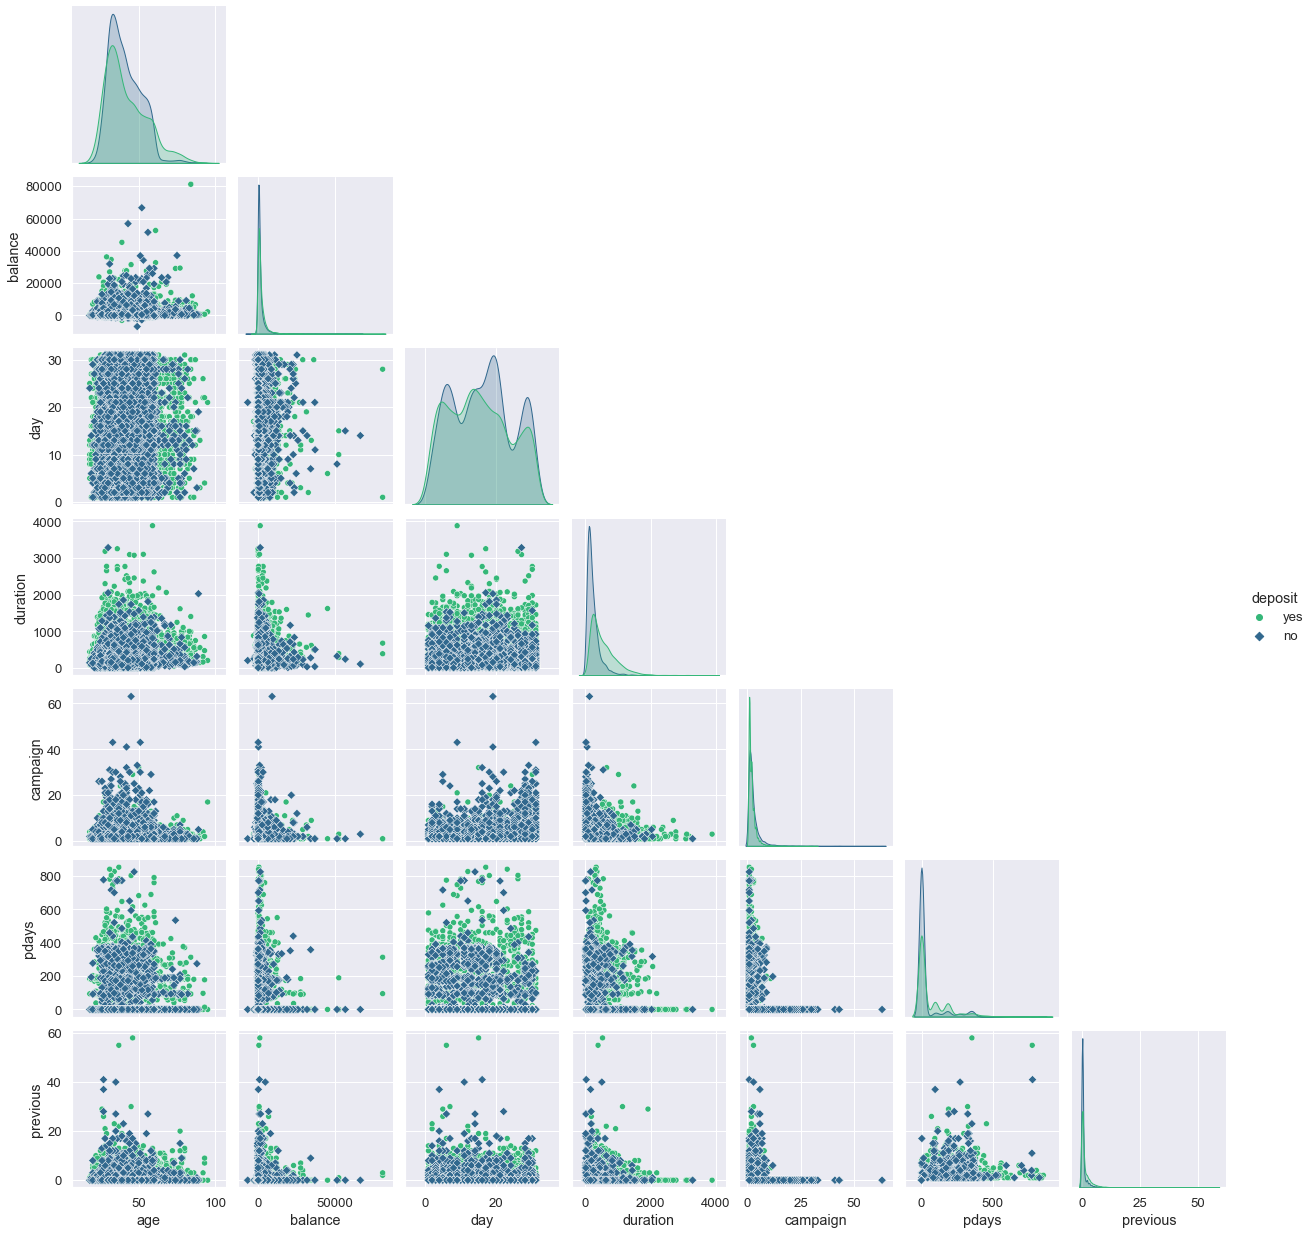

In [6]:
sns.set(font_scale=1.2)
sns.pairplot(data, hue="deposit", markers=["o", "D"],corner=True,palette = 'viridis_r');

### <font color= indigo>Examining Correlation Between Numerical Variables

In [7]:
##Encoding Traget variable
data['deposit'] = LabelEncoder().fit_transform(data['deposit'])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1


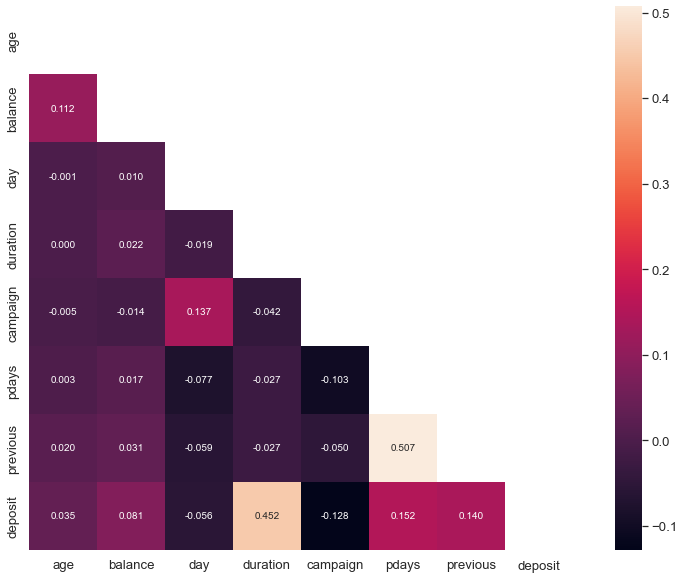

In [8]:
sns.set(font_scale=1.2)
cor = data.corr()

mask = np.zeros_like(cor)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 10))
    ax = sns.heatmap(cor, mask=mask, square=True,annot=True, annot_kws = {'size':10},fmt='.3f')

#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> - There appears to be a moderately strong correlation with positive correlation between previous and pdays.

<font color= darkcyan> - There appears to be a moderately positive correlation between 'deposit' and 'duration'. In other words, **the longer the contact time with the customer, the higher the probability of the customer to open a time deposit.**

 #### 1) Effect of Duration on Deposit Opening

The average time to contact the customer is 372 seconds is seen. Are customers above this average more likely to open time deposits?

In [9]:
avgDuration = data['duration'].mean()
print(f"""Number of customers contacted for more than average time : {data[data['duration'] > avgDuration]['duration'].count()} 
Number of customers contacted with less than average time : {data[data['duration'] < avgDuration]['duration'].count()}""")

Number of customers contacted for more than average time : 3845 
Number of customers contacted with less than average time : 7317


In [10]:
data['duration_status'] = np.select([(data['duration']< avgDuration)], ["Below Average"],default="Above Average")
pd.crosstab(data['duration_status'], data['deposit'])

deposit,0,1
duration_status,,
Above Average,870,2975
Below Average,5003,2314


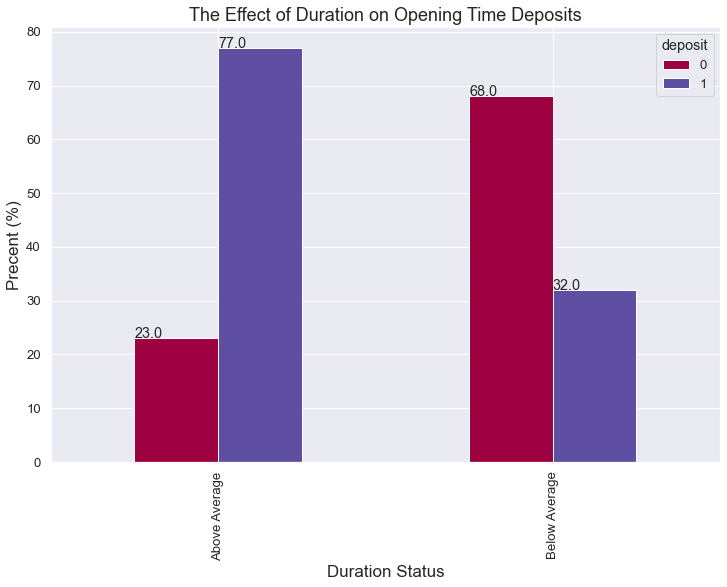

In [11]:
durCrosstab = pd.crosstab(data['duration_status'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.2)

ax = durCrosstab.plot(kind='bar', stacked=False, cmap='Spectral')
plt.title("The Effect of Duration on Opening Time Deposits", fontsize=18)
plt.xlabel("Duration Status", fontsize=17);
plt.ylabel("Precent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() *1, p.get_height() * 1))

plt.show()

#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> 77% of customers who are 'above the average' of the time spent for customer communication (duration) have opened a Deposit Account (deposit). Only 32% of customers contacted withbelow-average` time opened a Deposit Account. **This tells us it's a good idea to target customers with above average conversations.**

In [12]:
data['duration_status'] = np.select(
    [
        data['duration'].between(0, 400, inclusive=True), 
        data['duration'].between(400, 800, inclusive=True),
        data['duration'].between(800, 1200, inclusive=True), 
        data['duration'].between(1200, 1600, inclusive=True)    

    ], 
    [
        'Between 0-400 sec', 
        'Between 400-800 sec',
        'Between 800-1200 sec', 
        'Between 1200-1600 sec'
    ], 
    default='1600 sec long'
)

deposit                   0     1
duration_status                  
1600 sec long           7.0  93.0
Between 0-400 sec      67.0  33.0
Between 1200-1600 sec  10.0  90.0
Between 400-800 sec    27.0  73.0
Between 800-1200 sec   12.0  88.0


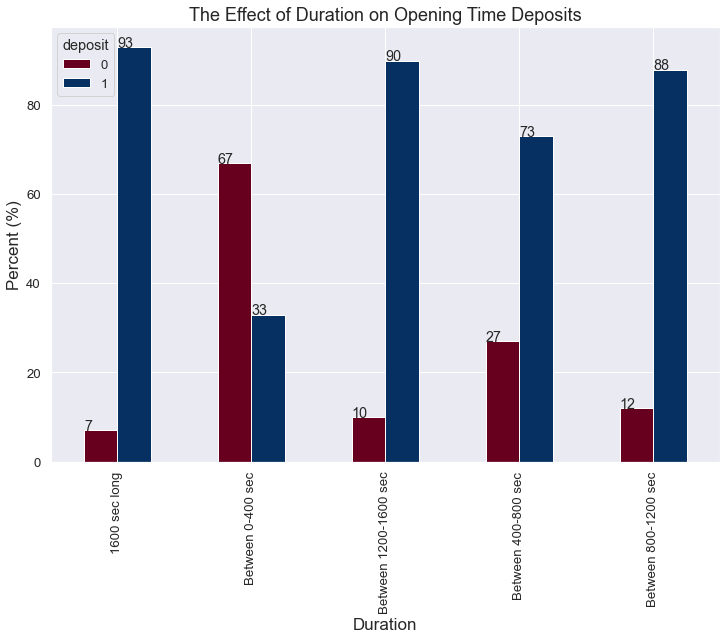

In [13]:
durationCrosstab = pd.crosstab(data['duration_status'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)
print(durationCrosstab)
sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.2)

ax = durationCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Effect of Duration on Opening Time Deposits", fontsize=18)
plt.xlabel("Duration", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> As can be seen, it is seen that the probability of Opening Time Deposits increases in negotiations over 400 seconds. As mentioned above **this tells us it's a good idea to target above average interviewed customers.**

#### 2) Relationship Between Education, Balance, and Deposit

In [14]:
for i in data["education"].value_counts().index:
    for j in data["deposit"].value_counts().index:
        miktar = data[(data["education"] == i) & (data["deposit"] == j)]["balance"].count()
        ortalama = round(miktar*100 / data["balance"].count(),3)
        print(f"Education level '{i}' and Deposit status '{j}' amount: {miktar}, percentage: {ortalama}",)

Education level 'secondary' and Deposit status '0' amount: 3026, percentage: 27.11
Education level 'secondary' and Deposit status '1' amount: 2450, percentage: 21.949
Education level 'tertiary' and Deposit status '0' amount: 1693, percentage: 15.168
Education level 'tertiary' and Deposit status '1' amount: 1996, percentage: 17.882
Education level 'primary' and Deposit status '0' amount: 909, percentage: 8.144
Education level 'primary' and Deposit status '1' amount: 591, percentage: 5.295
Education level 'unknown' and Deposit status '0' amount: 245, percentage: 2.195
Education level 'unknown' and Deposit status '1' amount: 252, percentage: 2.258


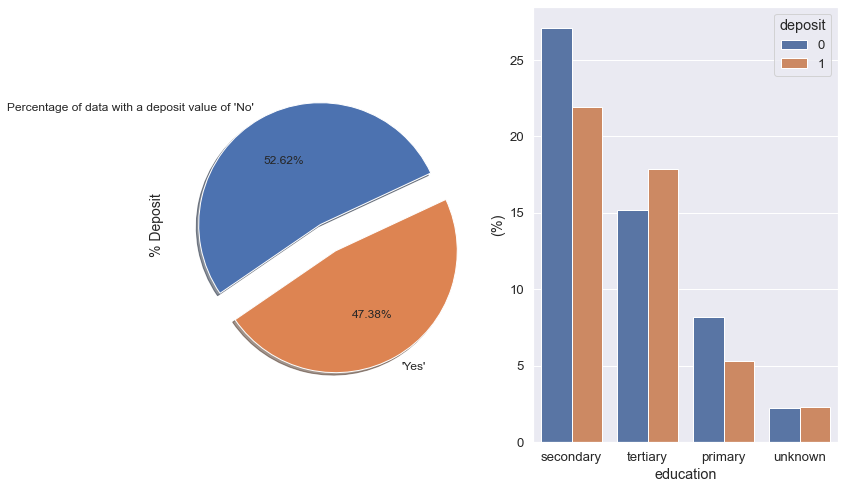

In [15]:
fig, ax = plt.subplots(1,2, figsize=(12,8))

labels ="Percentage of data with a deposit value of 'No'", "'Yes'"

# plt.suptitle('Information on Term Suscriptions', fontsize=20)

data["deposit"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, 
                                             labels=labels, fontsize=12, startangle=25)

ax[0].set_ylabel('% Deposit', fontsize=14)

sns.barplot(x="education", y="balance", hue="deposit", data=data, estimator=lambda x: len(x) / len(data) * 100)
ax[1].set(ylabel="(%)")
plt.show()

**Education**: As can be seen, the level of 'education' has a significant impact on the 'Customer's individual balance'.

#### 4) Relationship Between Balance and Marital

In [16]:
data["marital"].value_counts()

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

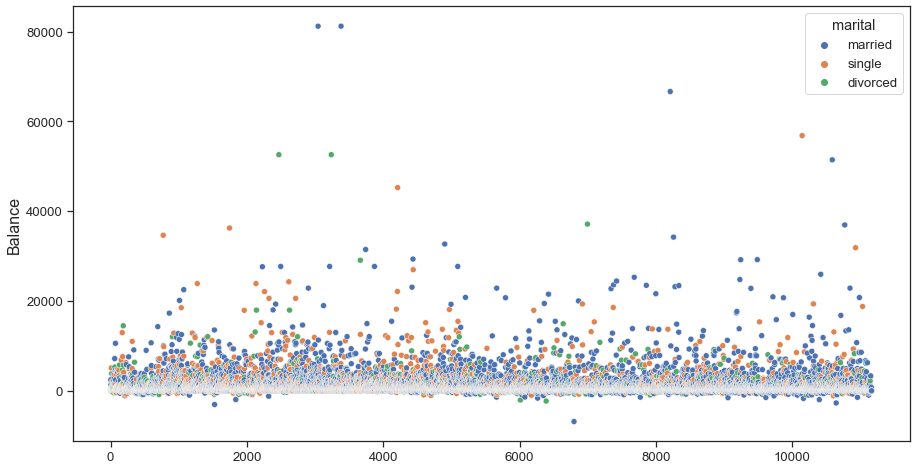

In [17]:
sns.set_style('ticks')

fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x=data.index, y='balance', hue='marital',ax=ax)
plt.ylabel("Balance",fontsize=16)
plt.show()

It is not possible to say anything definite with Scatter Plot. For this, let's apply the one-way anova test to see the significance between the variables. Hypotheses for this:

**H0:** There is no statistically significant difference between the balances and marital status of the customers.

**H1:** There is a difference between customer balances and marital status.

In [18]:
CategoryGroupLists=data.groupby('marital')['balance'].apply(list)
CategoryGroupLists

marital
divorced    [545, 3837, 168, 785, 388, 390, 5, -395, 300, ...
married     [2343, 45, 1270, 2476, 184, 830, 1, 309, 199, ...
single      [0, 5090, 100, 460, 703, 611, 2067, 381, 40, 2...
Name: balance, dtype: object

In [19]:
AnovaResults = f_oneway(*CategoryGroupLists)
print('The p-value as a result of the Analysis of Variance: ', AnovaResults[1])

The p-value as a result of the Analysis of Variance:  0.01941985488556258


#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> Since the p-value is 0.019<0.05 here, the H0 hypothesis for the significance test is rejected. In other words, there is a relationship between the marriage status of the customers and their bank accounts.

**Marital Status:** The effect of divorce has a significant impact on balance.

#### 5) Relationship Between Balance and Loan

In [20]:
data['balance_status'] = np.select([(data['balance'] < data["balance"].mean())], ["Below Average"],default="Above Average")
pd.crosstab(data['balance_status'], data['loan'])

loan,no,yes
balance_status,,
Above Average,2829,230
Below Average,6873,1230


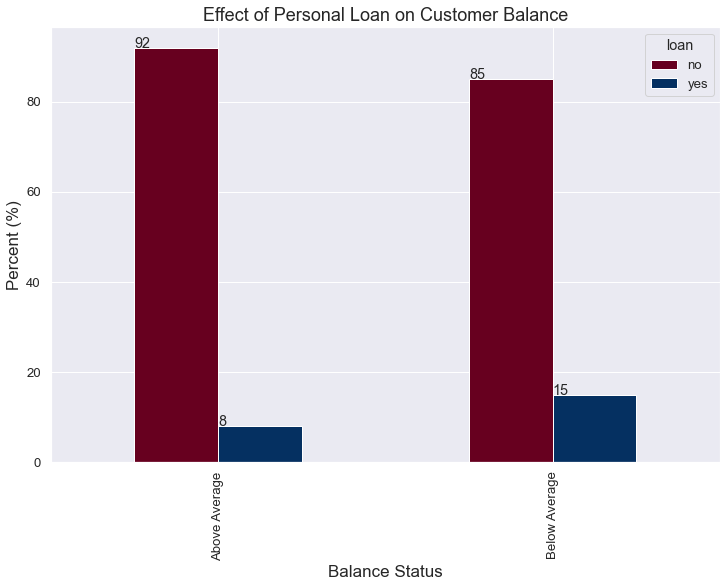

In [21]:
balanceCrosstab = pd.crosstab(data['balance_status'], data['loan']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.2)

ax = balanceCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("Effect of Personal Loan on Customer Balance", fontsize=18)
plt.xlabel("Balance Status", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> Potential customers in the Low and No Balance category seem to be more likely to have Loan than those in the average and high balance category.

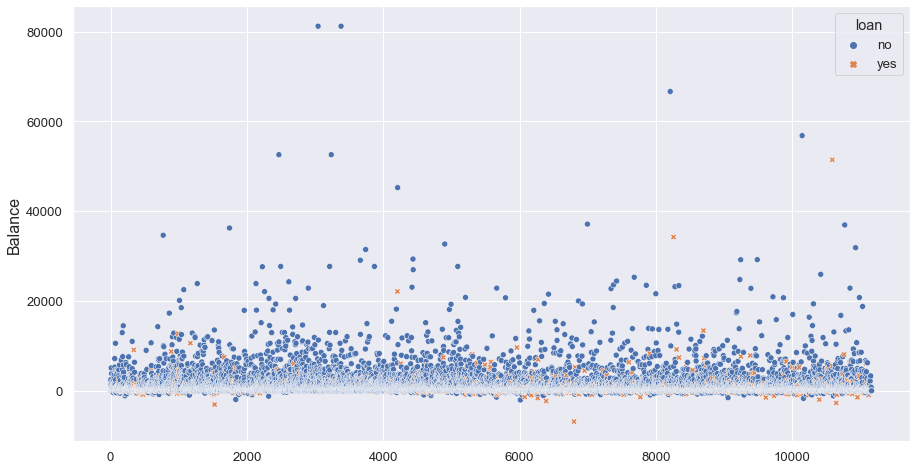

In [22]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x=data.index, y='balance', hue='loan',style="loan",ax=ax)
plt.ylabel("Balance",fontsize=16)
plt.show()

Let's apply the one-way anova test to see the significance between the variables. Hypotheses for this:

**H0:** There is no statistically significant difference between customers' balances and loan.

**H1:** There is have statistically significant difference between customers' balances and loan.

In [23]:
CategoryGroupLists=data.groupby('loan')['balance'].apply(list)
CategoryGroupLists

loan
no     [2343, 45, 1270, 2476, 184, 545, 1, 5090, 100,...
yes    [0, 830, 199, 168, 1262, 517, 1521, 341, 94, 1...
Name: balance, dtype: object

In [24]:
AnovaResults = f_oneway(*CategoryGroupLists)
print('The p-value as a result of the Analysis of Variance: ', format(AnovaResults[1], "0.5f"))

The p-value as a result of the Analysis of Variance:  0.00000


#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> Since the p value here is less than 0.05, the H0 hypothesis is rejected for the significance test. In other words, there is a relationship between Customers' balances and their personal loans.

**Loan:** Whether the potential customer has used a loan before has a significant impact on the amount of balance he or she has.

#### 6) Relationship Between Job and Balance

##### Preview of Job Variable

In [115]:
fig = px.pie(data, values=data["job"].value_counts().values, names= data["job"].value_counts().index, 
             color_discrete_sequence=px.colors.sequential.RdBu,title="Job Distribution of Customers")
fig.show()

##### Amount of Job:

In [26]:
print(f"{data['job'].value_counts().index[0].capitalize()} is the more common profession in this dataset.Value: {data['job'].value_counts().values[0]}")
print("-"*117)

Management is the more common profession in this dataset.Value: 2566
---------------------------------------------------------------------------------------------------------------------


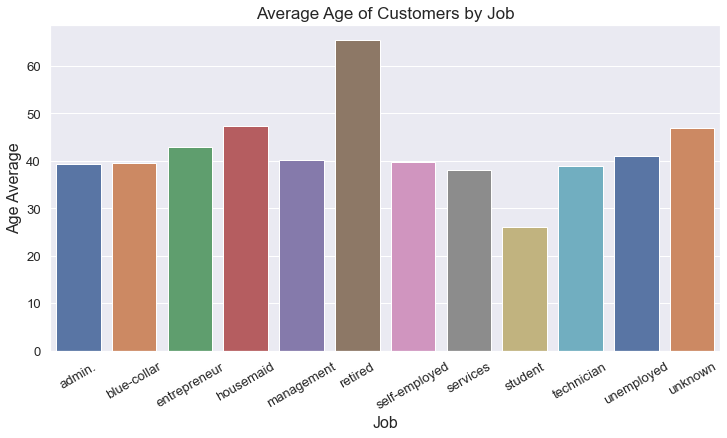

In [27]:
sns.set(font_scale=1.2)

fig, ax = plt.subplots(figsize=(12,6))
rotation = sns.barplot(data = data , 
                       x=data.groupby("job")["age"].mean().index,
                       y=data.groupby("job")["age"].mean().values,
                       ax=ax,
                       palette="deep")
for item in rotation.get_xticklabels():
    item.set_rotation(30)

plt.title("Average Age of Customers by Job", fontsize=17)
plt.xlabel("Job", fontsize=16)
plt.ylabel("Age Average", fontsize=16)
plt.show()

**Age by Job**: As expected, 'Retired' has the highest average age, and 'Student' has the lowest.

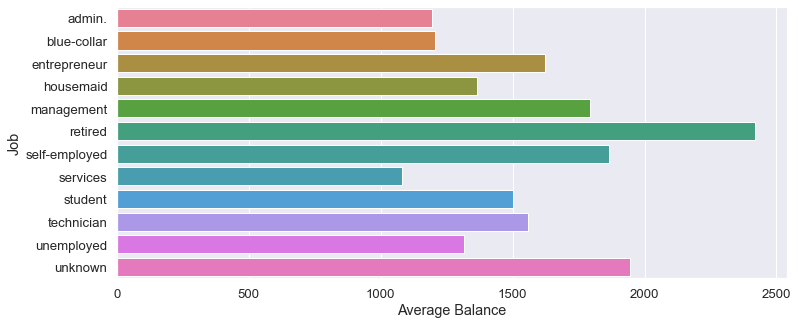

In [28]:
fig, ax = plt.subplots(figsize=(12,5))
sns.barplot(data.groupby("job")["balance"].mean().values,
            data.groupby("job")["balance"].mean().index,
            palette = "husl",
            ax=ax);

plt.ylabel("Job")
plt.xlabel("Average Balance")
plt.show()


**Balance by Job**: Retired are those with the highest balance in their accounts.

In [29]:
pd.crosstab(data['job'], data['deposit'])

deposit,0,1
job,,
admin.,703,631
blue-collar,1236,708
entrepreneur,205,123
housemaid,165,109
management,1265,1301
retired,262,516
self-employed,218,187
services,554,369
student,91,269


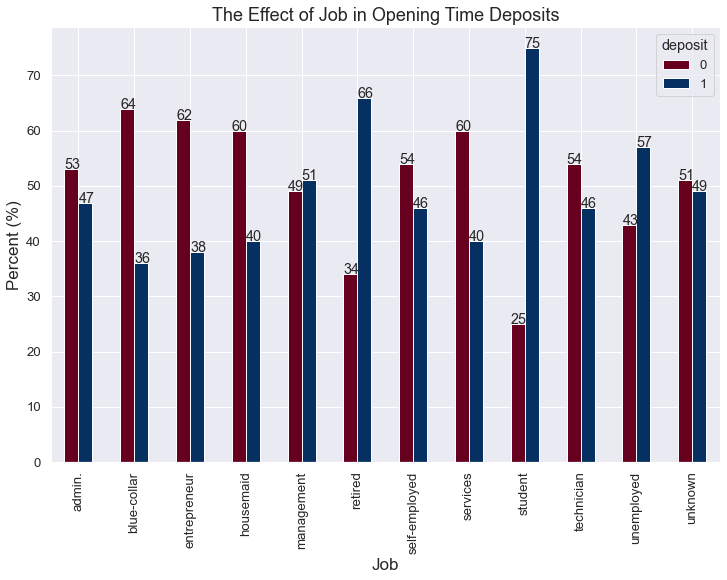

In [30]:
jobCrosstab = pd.crosstab(data['job'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.2)

ax = jobCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Effect of Job in Opening Time Deposits", fontsize=18)
plt.xlabel("Job", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

It is seen that Students and Retirees are more likely to Open Time Deposits.

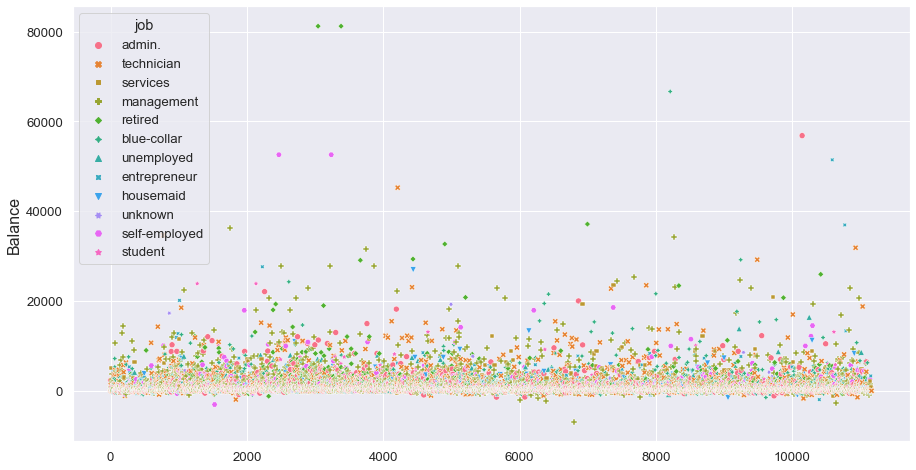

In [31]:
fig, ax = plt.subplots(figsize=(15,8))
sns.scatterplot(data=data, x=data.index, y='balance', hue='job',style="job",ax=ax)
plt.ylabel("Balance",fontsize=16)
plt.show()

**H0:** There is no statistically significant difference between customers' balances and business.

**H1:** There is a difference between customer balances and business.

In [32]:
CategoryGroupLists=data.groupby('job')['balance'].apply(list)
CategoryGroupLists

job
admin.           [2343, 45, 184, 100, 55, 168, 785, 307, 1535, ...
blue-collar      [309, 460, 611, -192, 40, 3, 759, -1, 82, 10, ...
entrepreneur     [4, -395, 0, 606, 62, 0, 0, 853, 5345, 323, 30...
housemaid        [3923, 104, 1238, 879, 625, 3727, 2152, 113, 3...
management       [0, 830, 199, 3837, 2067, 388, 311, 5, 119, 19...
retired          [545, 1521, 1542, -233, 4499, 351, -88, 293, 1...
self-employed    [144, 1354, 0, 1242, -754, 543, 425, 1382, 484...
services         [2476, 5090, -8, -9, 313, 281, 49, 1040, 271, ...
student          [949, 3316, 46, 5, 119, 1747, 2351, 67, 2766, ...
technician       [1270, 1, 703, 22, 65, 3285, 1443, 3652, -1, 4...
unemployed       [381, 3354, 1713, 3674, 0, 86, 1766, 3229, 519...
unknown          [341, 5361, 17297, 111, 859, 4465, 0, 68, 341,...
Name: balance, dtype: object

In [33]:
AnovaResults = f_oneway(*CategoryGroupLists)
print('The p-value as a result of the Analysis of Variance: ', format(AnovaResults[1], "0.5f"))

The p-value as a result of the Analysis of Variance:  0.00000


#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> Since the p-value is less than 0.05 here, the H0 hypothesis for the significance test is rejected. In other words, there is a relationship between the balances of the Customers and their jobs

#### 7) Age Effect on Deposit Opening

In [34]:
data['age_status'] = np.select(
    [
        data['age'].between(0, 25, inclusive=True), 
        data['age'].between(25, 60, inclusive=True),
        data['age'].between(60, 90, inclusive=True)        
    ], 
    [
        '0-25 years old', 
        '25-60 years old',
        '60-90 years old', 
    ], 
    default='Over 90 years old'
)

In [35]:
pd.crosstab(data['age_status'], data['deposit'])

deposit,0,1
age_status,,
0-25 years old,130,320
25-60 years old,5634,4467
60-90 years old,109,497
Over 90 years old,0,5


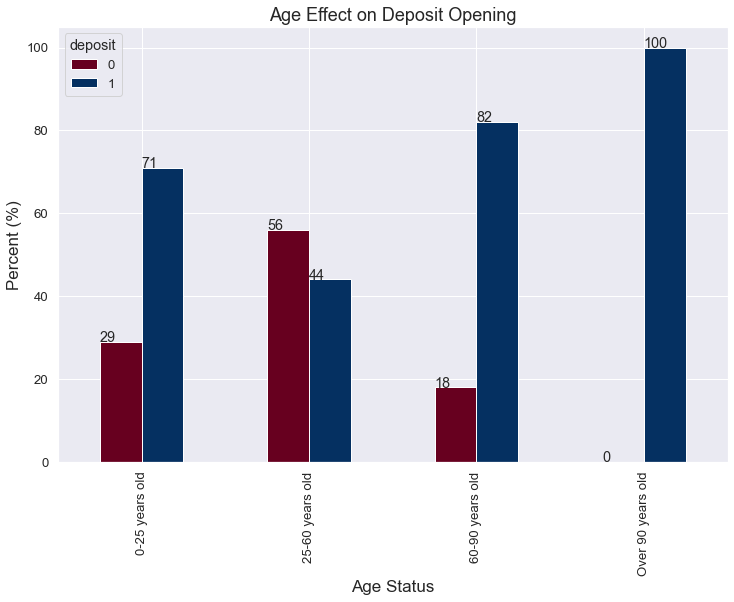

In [36]:
ageCrosstab = pd.crosstab(data['age_status'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.2)

ax = ageCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("Age Effect on Deposit Opening", fontsize=18)
plt.xlabel("Age Status", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> It is seen that customers under the age of 25 and over the age of 60 have a high rate of Time Deposits.

#### 8) Effect of Month on Deposit

In [37]:
data["month"].value_counts()

may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64

In [38]:
pd.crosstab(data['month'], data['deposit'])

deposit,0,1
month,,
apr,346,577
aug,831,688
dec,10,100
feb,335,441
jan,202,142
jul,887,627
jun,676,546
mar,28,248
may,1899,925


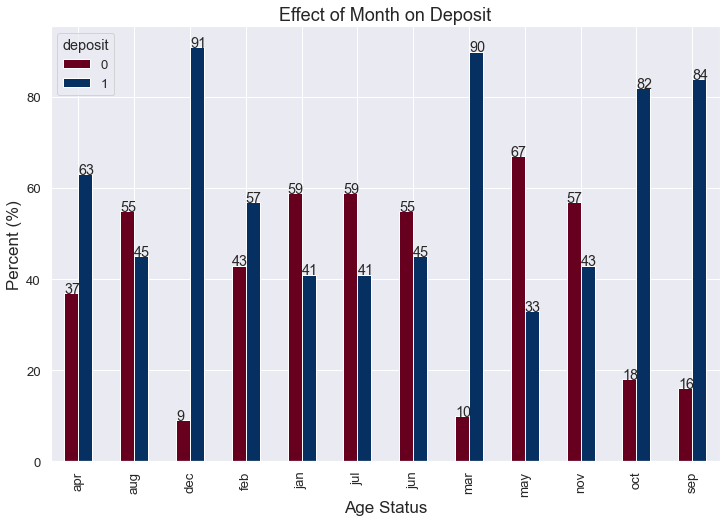

In [39]:
monthCrosstab = pd.crosstab(data['month'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(12,8)})
sns.set(font_scale=1.2)

ax = monthCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("Effect of Month on Deposit", fontsize=18)
plt.xlabel("Age Status", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> In September-October-March and December, the rate of opening time deposits is very high.

#### 9) The Effect of Campaign Calls in Opening Time Deposits

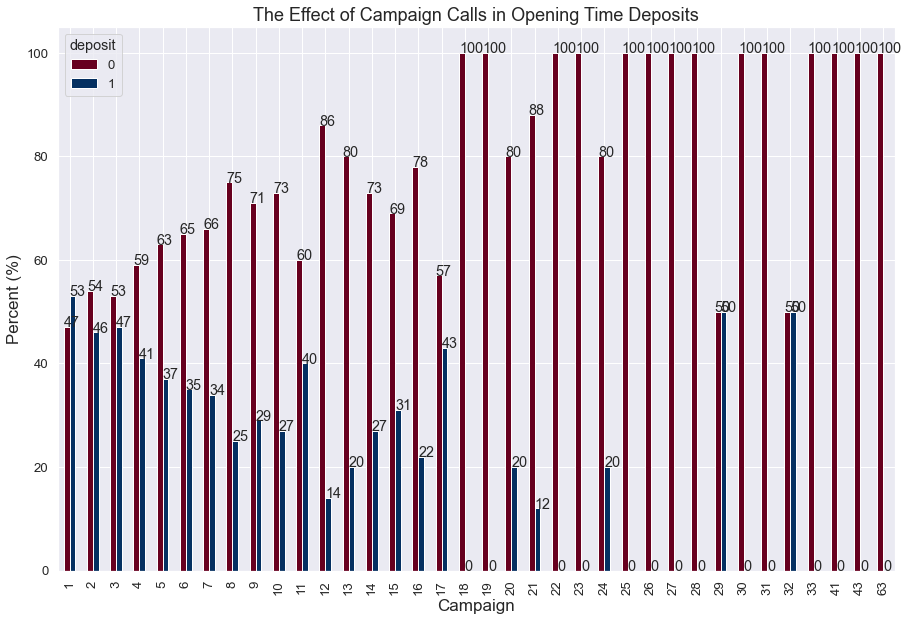

In [40]:
campaignCrosstab = pd.crosstab(data['campaign'], data['deposit']).apply(lambda r: round(r/r.sum(), 2) * 100, axis=1)

sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale=1.2)

ax = campaignCrosstab.plot(kind='bar', stacked=False, cmap='RdBu')
plt.title("The Effect of Campaign Calls in Opening Time Deposits", fontsize=18)
plt.xlabel("Campaign", fontsize=17);
plt.ylabel("Percent (%)", fontsize=17)

for p in ax.patches:
    ax.annotate(str(round(p.get_height())), (p.get_x() *1, p.get_height() * 1))

plt.show()

#### <b> <font color= darkslategray>Insights:<font>
<font color= darkcyan> It is seen that the probability of Opening Time Deposits decreased after the 3rd meeting with the potential customer.

## <font color= steelblue>5. Data Pre-processing

### <font color= indigo> Editing Categorical Variables

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [42]:
#Use LabelEncoder 
objectColList = df.select_dtypes(include=['object']).columns.to_list()
le = LabelEncoder()
for col in objectColList:
    df[col] = le.fit_transform(data[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        11162 non-null  int64
 1   job        11162 non-null  int64
 2   marital    11162 non-null  int64
 3   education  11162 non-null  int64
 4   default    11162 non-null  int64
 5   balance    11162 non-null  int64
 6   housing    11162 non-null  int64
 7   loan       11162 non-null  int64
 8   contact    11162 non-null  int64
 9   day        11162 non-null  int64
 10  month      11162 non-null  int64
 11  duration   11162 non-null  int64
 12  campaign   11162 non-null  int64
 13  pdays      11162 non-null  int64
 14  previous   11162 non-null  int64
 15  poutcome   11162 non-null  int64
 16  deposit    11162 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


### <font color= indigo> Splitting Data

In [43]:
X = df.drop('deposit',axis=1)
y = df[['deposit']]

In [44]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=35)

In [45]:
x_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
1398,33,4,2,2,0,3161,1,0,0,2,0,313,3,-1,0,3
2099,39,9,1,1,0,116,0,0,0,22,8,554,2,-1,0,3
2849,51,6,2,1,0,0,0,0,0,29,10,1707,2,-1,0,3
2998,37,0,1,1,0,0,1,0,0,9,2,179,1,190,1,2
954,49,9,2,1,0,-188,1,1,0,17,9,454,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,69,5,1,1,0,3588,1,0,0,10,2,429,1,-1,0,3
7148,34,4,1,2,0,13,1,0,0,30,5,99,3,-1,0,3
9143,47,1,1,1,0,2775,0,0,2,14,8,262,1,-1,0,3
1295,28,9,2,1,0,1363,0,0,0,27,3,79,1,-1,0,3


### <font color= indigo> Scaling Data

Scaling compresses the data between certain values without changing the distribution of the data in the data set.

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

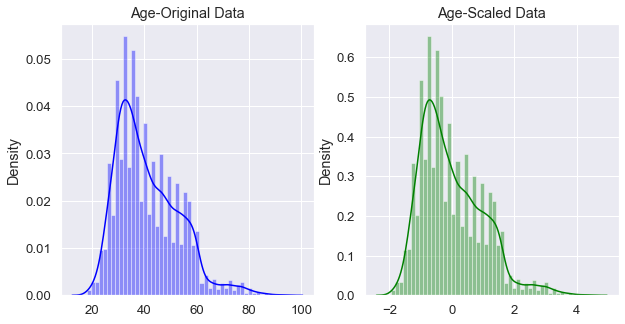

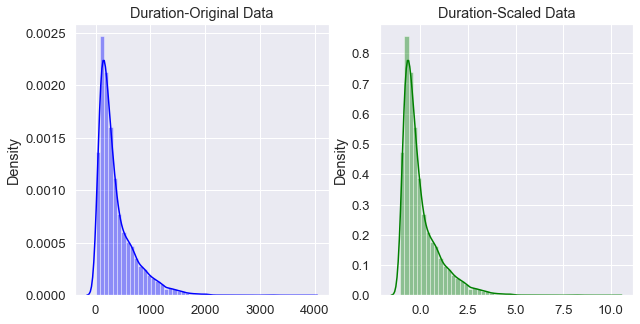

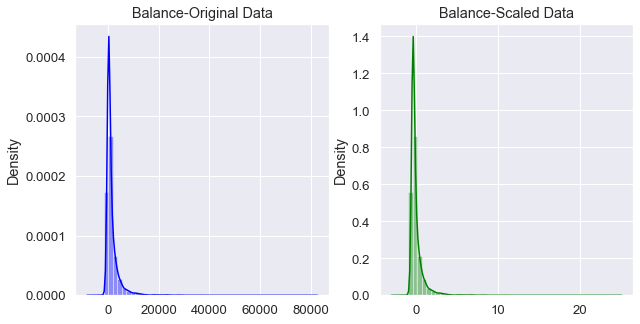

In [47]:
# Let's view the original and scaled version of some columns
columnListe = ['age','duration','balance']
for i in columnListe:
    
    scaled_data = scaler.fit_transform(data[i].values.reshape(-1,1))
    

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    sns.distplot(data[i].values, ax = ax[0],color = "blue")
    ax[0].set_title(f"{i.capitalize()}-Original Data")
    sns.distplot(scaled_data, ax=ax[1],color = "green")
    ax[1].set_title(f"{i.capitalize()}-Scaled Data")

In [48]:
X_train = pd.DataFrame(X_train,columns =list(x_train.columns) )
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,-0.691848,-0.150971,1.277789,0.961796,-0.122965,0.527355,1.057063,-0.385259,-0.596763,-1.616845,-1.714270,-0.170322,0.188866,-0.484625,-0.359726,0.524773
1,-0.189210,1.400257,-0.316813,-0.375255,-0.122965,-0.449101,-0.946017,-0.385259,-0.596763,0.758587,0.794565,0.530158,-0.187056,-0.484625,-0.359726,0.524773
2,0.816068,0.469520,1.277789,-0.375255,-0.122965,-0.486299,-0.946017,-0.385259,-0.596763,1.589988,1.421774,3.881416,-0.187056,-0.484625,-0.359726,0.524773
3,-0.356756,-1.391953,-0.316813,-0.375255,-0.122965,-0.486299,1.057063,-0.385259,-0.596763,-0.785443,-1.087061,-0.559800,-0.562977,1.248424,0.064132,-0.465233
4,0.648521,1.400257,1.277789,-0.375255,-0.122965,-0.546586,1.057063,2.595657,-0.596763,0.164729,1.108169,0.239502,-0.562977,-0.484625,-0.359726,0.524773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8924,2.323984,0.159275,-0.316813,-0.375255,-0.122965,0.664283,1.057063,-0.385259,-0.596763,-0.666672,-1.087061,0.166838,-0.562977,-0.484625,-0.359726,0.524773
8925,-0.608075,-0.150971,-0.316813,0.961796,-0.122965,-0.482130,1.057063,-0.385259,-0.596763,1.708760,-0.146248,-0.792325,0.188866,-0.484625,-0.359726,0.524773
8926,0.480975,-1.081707,-0.316813,-0.375255,-0.122965,0.403574,-0.946017,-0.385259,1.845261,-0.191586,0.794565,-0.318556,-0.562977,-0.484625,-0.359726,0.524773
8927,-1.110714,1.400257,1.277789,-0.375255,-0.122965,-0.049219,-0.946017,-0.385259,-0.596763,1.352445,-0.773457,-0.850456,-0.562977,-0.484625,-0.359726,0.524773


## <font color= steelblue>6. Feature Selection

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

In [49]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.02966747, 0.01093331, 0.01079837, 0.00939848, 0.        ,
       0.03912639, 0.02655396, 0.01595433, 0.04075547, 0.01495858,
       0.04892497, 0.14858874, 0.00870548, 0.04380281, 0.03071617,
       0.04299832])

In [50]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

duration     0.148589
month        0.048925
pdays        0.043803
poutcome     0.042998
contact      0.040755
balance      0.039126
previous     0.030716
age          0.029667
housing      0.026554
loan         0.015954
day          0.014959
job          0.010933
marital      0.010798
education    0.009398
campaign     0.008705
default      0.000000
dtype: float64

<AxesSubplot:>

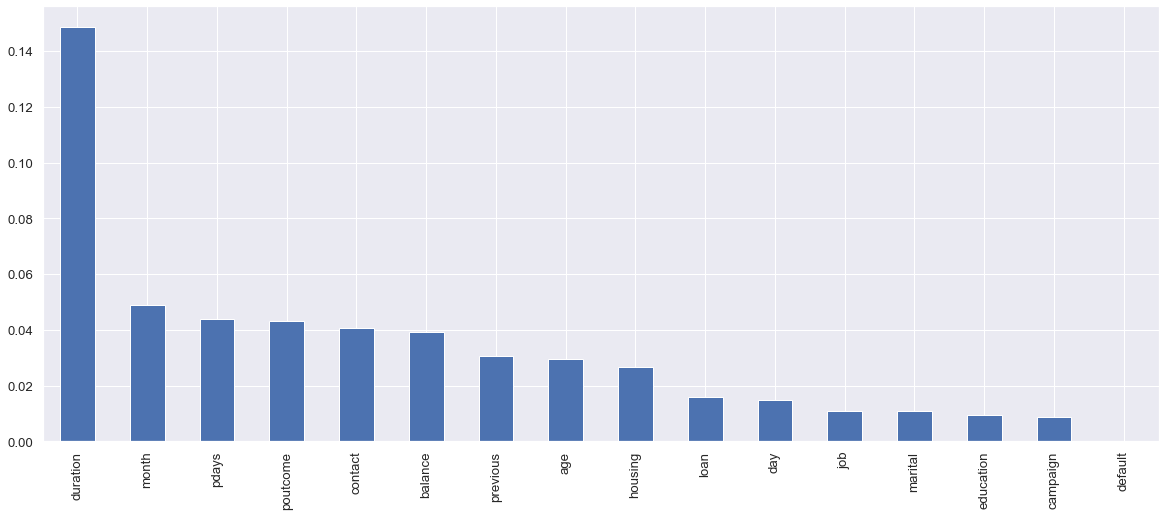

In [51]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [52]:
#No we Will select the  top 10 important features
sel_ten_cols = SelectKBest(mutual_info_classif, k=10)
sel_ten_cols.fit(X_train, y_train)
cols=X_train.columns[sel_ten_cols.get_support()]
cols

Index(['age', 'balance', 'housing', 'contact', 'day', 'month', 'duration',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [53]:
X_train_new = X_train[cols]
X_train_new

,age,balance,housing,contact,day,month,duration,pdays,previous,poutcome
0,-0.691848,0.527355,1.057063,-0.596763,-1.616845,-1.714270,-0.170322,-0.484625,-0.359726,0.524773
1,-0.189210,-0.449101,-0.946017,-0.596763,0.758587,0.794565,0.530158,-0.484625,-0.359726,0.524773
2,0.816068,-0.486299,-0.946017,-0.596763,1.589988,1.421774,3.881416,-0.484625,-0.359726,0.524773
3,-0.356756,-0.486299,1.057063,-0.596763,-0.785443,-1.087061,-0.559800,1.248424,0.064132,-0.465233
4,0.648521,-0.546586,1.057063,-0.596763,0.164729,1.108169,0.239502,-0.484625,-0.359726,0.524773
...,...,...,...,...,...,...,...,...,...,...
8924,2.323984,0.664283,1.057063,-0.596763,-0.666672,-1.087061,0.166838,-0.484625,-0.359726,0.524773
8925,-0.608075,-0.482130,1.057063,-0.596763,1.708760,-0.146248,-0.792325,-0.484625,-0.359726,0.524773
8926,0.480975,0.403574,-0.946017,1.845261,-0.191586,0.794565,-0.318556,-0.484625,-0.359726,0.524773
8927,-1.110714,-0.049219,-0.946017,-0.596763,1.352445,-0.773457,-0.850456,-0.484625,-0.359726,0.524773


## <font color= steelblue>7. Model Selection

In [54]:
dictClassifiers = {
    "Logistic Regression": LogisticRegression(),
    "Linear SVM": SVC(),
    "Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": tree.DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=18)
}

In [55]:
## Training all the data with classification algorithms and take a guess over all the data.
lenClassifiers = len(dictClassifiers.keys())

def batchClassification(X_train_new, Y_train, verbose = True):
    
    #Create a dataframe of dimension (model number, 3) with values 0
    dfResults = pd.DataFrame(data=np.zeros(shape=(lenClassifiers,3)), columns = ['classifier_model', 'train_score', 'training_time'])
    count = 0
    for key, classifier in dictClassifiers.items():
        tStart = time.process_time()     #time before training
        classifier.fit(X_train, Y_train) #training
        tEnd = time.process_time()       #time after training
        tDiff = tEnd - tStart            #Time between training start and end
        trainScore = classifier.score(X_train, Y_train)
        dfResults.loc[count,'classifier_model'] = key
        dfResults.loc[count,'train_score'] = trainScore
        dfResults.loc[count,'training_time'] = tDiff
        count+=1
    return dfResults

In [56]:
dfResults = batchClassification(X_train_new, y_train)
dfResults

,classifier_model,train_score,training_time
0,Logistic Regression,0.796506,0.113158
1,Linear SVM,0.846567,3.524886
2,Nearest Neighbors,0.839736,0.001688
3,Decision Tree,1.000000,0.268666
4,Random Forest,0.996752,0.250188


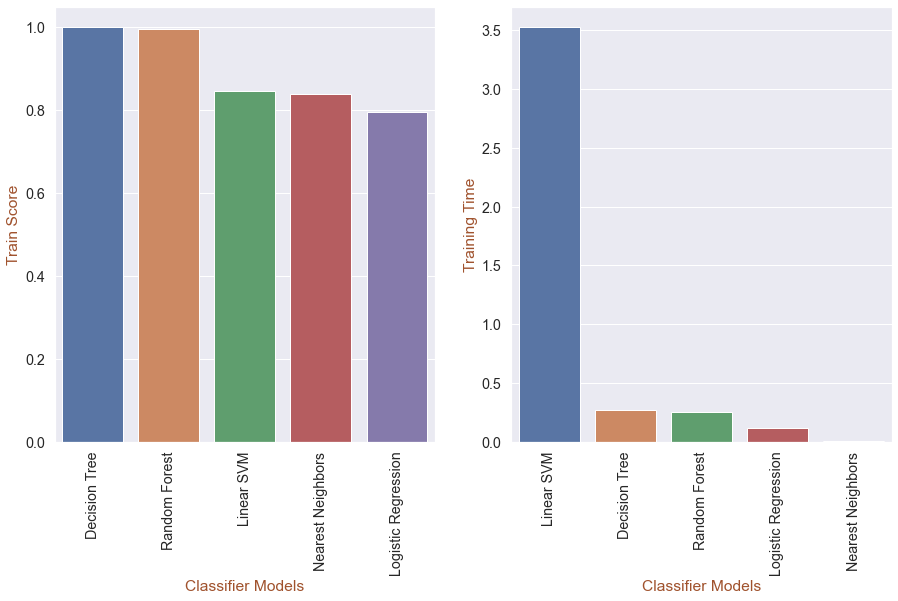

In [57]:
#visualization
sns.set(font_scale=1.3)
# sns.set_style("whitegrid")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
rotation = sns.barplot( data = dfResults.sort_values(by='train_score', ascending=False) , 
                        y=dfResults.sort_values(by='train_score', ascending=False)["train_score"].values,
                        x=dfResults.sort_values(by='train_score', ascending=False)["classifier_model"].values,
                        ax=ax1,
                        palette="deep")

for item in rotation.get_xticklabels():
    item.set_rotation(90)

ax1.set_xlabel('Classifier Models',color="sienna")
ax1.set_ylabel('Train Score',color="sienna")

rotation = sns.barplot( data = dfResults.sort_values(by='training_time', ascending=False) , 
                        y=dfResults.sort_values(by='training_time', ascending=False)["training_time"].values,
                        x=dfResults.sort_values(by='training_time', ascending=False)["classifier_model"].values,
                        ax=ax2)

for item in rotation.get_xticklabels():
    item.set_rotation(90)

ax2.set_xlabel('Classifier Models',color="sienna")
ax2.set_ylabel('Training Time',color="sienna")

plt.show()

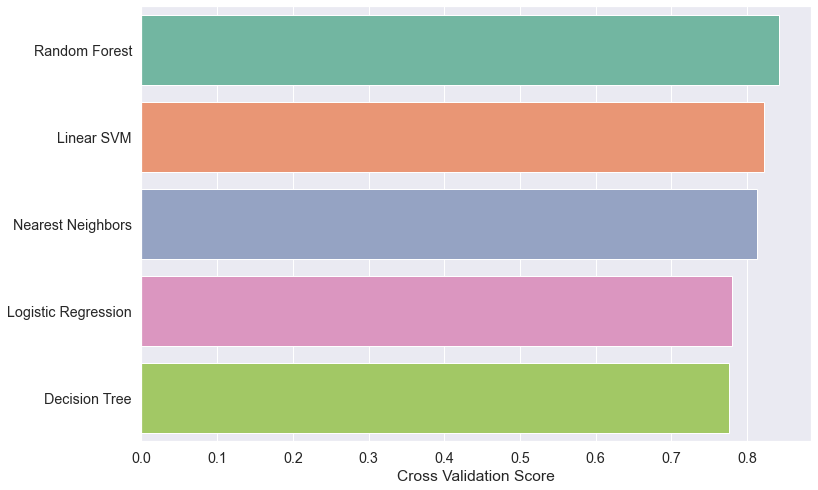

In [58]:
scoreDict = {}
def modelClassifiers(key,value):
    folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
    scoreCross = cross_val_score(value, X_train_new, y_train, cv=folds, scoring = "accuracy").mean() 
    scoreDict[key] = scoreCross

for key,value in dictClassifiers.items():
    modelClassifiers(key,value) #Call funct.


#Visualization    
scoreDict = dict(sorted(scoreDict.items(), key=lambda x: x[1], reverse=True))

fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(list(scoreDict.values()),
            list(scoreDict.keys()),
            palette = "Set2",
            ax=ax);
plt.xlabel("Cross Validation Score")
plt.show()

In [59]:
scoreDict

{'Random Forest': 0.8425351136643249,
 'Linear SVM': 0.8220405093929365,
 'Nearest Neighbors': 0.8137522032349264,
 'Logistic Regression': 0.7801511758118701,
 'Decision Tree': 0.7764586545076555}

#### Display of Train Score and Cross Validation Scores

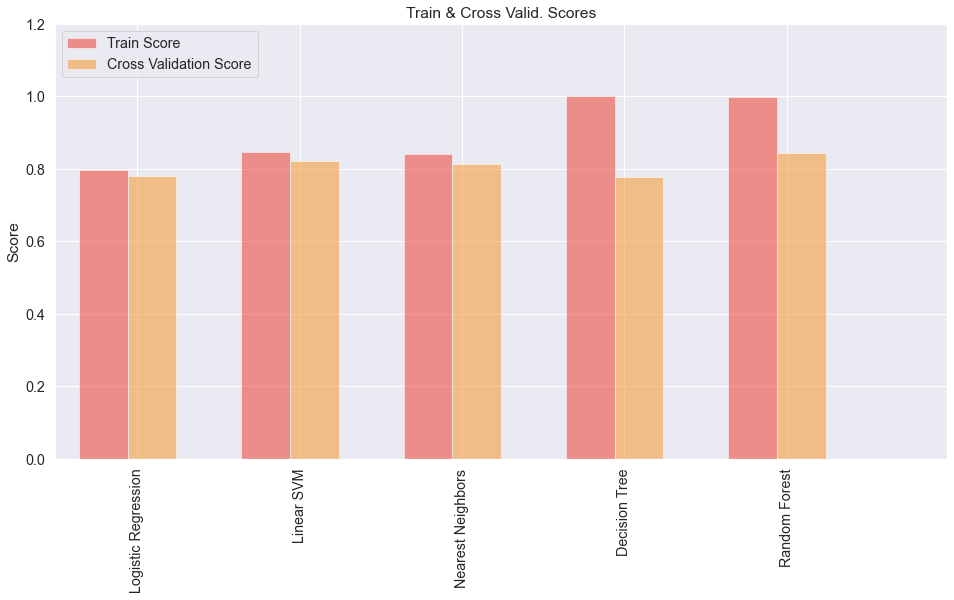

In [60]:
dfCross = pd.DataFrame ([list(scoreDict.keys()),list(scoreDict.values())]).transpose()
dfCross.columns = ['classifier_model','cross_validation']
dfMerge = pd.merge(dfResults, dfCross, on='classifier_model', how='inner')

pos = list(range(len(dfMerge['train_score'])))
width = 0.3

fig, ax = plt.subplots(figsize=(16,8))

plt.bar(pos, dfMerge['train_score'], width, alpha=0.5, color='#EE3224')
plt.bar([p + width for p in pos], dfMerge['cross_validation'], width, alpha=0.5, color='#F78F1E')

ax.set_xticks([p + 0.7 * width for p in pos])
ax.set_xticklabels(dfMerge['classifier_model'],rotation=90)

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim(0,max(dfMerge['train_score'])+0.2 )

# Adding the legend and showing the plot
plt.legend(['Train Score', 'Cross Validation Score'], loc='upper left')
ax.set_ylabel('Score')
ax.set_title('Train & Cross Valid. Scores')
plt.show()

#### We can say that the score of the Linear SVM Model is more successful and the probability of Overfitting is the least compared to other model scores. Also we can see that Random Forest performed best in Cross Validation.


## <font color= steelblue>8. Hyper-parameter Tuning

### <font color= indigo> Optimizing the hyper-parameters of the Random Forest with Optuna 

In [69]:
def objective(trial: Trial,X,y) -> float:

    param = {
                "criterion": trial.suggest_categorical("criterion", ["gini", "entropy"]),
                "n_estimators" :trial.suggest_int('n_estimators', 0, 500),
                'max_depth':trial.suggest_int('max_depth', 2, 100),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1,4),
                'min_samples_split':trial.suggest_int('min_samples_split', 2,15),
                'max_features': trial.suggest_categorical('max_features',['auto', 'sqrt'])
            }
    
    model = RandomForestClassifier(**param)
    
    return cross_val_score(model, X, y, cv=4,scoring="accuracy").mean()

In [70]:
study = optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial : objective(trial,X_train_new,y_train),n_trials= 70)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

[I 2023-01-07 11:28:02,149] A new study created in memory with name: no-name-1b99b2b6-6253-4ec4-a312-25904f598a4f
[I 2023-01-07 11:28:04,278] Trial 0 finished with value: 0.8453349541016394 and parameters: {'criterion': 'entropy', 'n_estimators': 88, 'max_depth': 71, 'min_samples_leaf': 2, 'min_samples_split': 11, 'max_features': 'auto'}. Best is trial 0 with value: 0.8453349541016394.
[I 2023-01-07 11:28:13,404] Trial 1 finished with value: 0.842759441306438 and parameters: {'criterion': 'entropy', 'n_estimators': 391, 'max_depth': 74, 'min_samples_leaf': 3, 'min_samples_split': 9, 'max_features': 'auto'}. Best is trial 0 with value: 0.8453349541016394.
[I 2023-01-07 11:28:18,412] Trial 2 finished with value: 0.841640222341001 and parameters: {'criterion': 'entropy', 'n_estimators': 193, 'max_depth': 75, 'min_samples_leaf': 1, 'min_samples_split': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8453349541016394.
[I 2023-01-07 11:28:19,751] Trial 3 finished with value: 0.8421

[I 2023-01-07 11:30:58,461] Trial 28 finished with value: 0.842647283658129 and parameters: {'criterion': 'entropy', 'n_estimators': 282, 'max_depth': 67, 'min_samples_leaf': 1, 'min_samples_split': 7, 'max_features': 'auto'}. Best is trial 21 with value: 0.8455594198781073.
[I 2023-01-07 11:31:03,232] Trial 29 finished with value: 0.8433192765089317 and parameters: {'criterion': 'entropy', 'n_estimators': 190, 'max_depth': 93, 'min_samples_leaf': 2, 'min_samples_split': 9, 'max_features': 'auto'}. Best is trial 21 with value: 0.8455594198781073.
[I 2023-01-07 11:31:03,287] Trial 30 finished with value: 0.7786979119014714 and parameters: {'criterion': 'entropy', 'n_estimators': 1, 'max_depth': 79, 'min_samples_leaf': 1, 'min_samples_split': 13, 'max_features': 'auto'}. Best is trial 21 with value: 0.8455594198781073.
[I 2023-01-07 11:31:13,367] Trial 31 finished with value: 0.8419756920869268 and parameters: {'criterion': 'entropy', 'n_estimators': 377, 'max_depth': 70, 'min_samples_le

[I 2023-01-07 11:34:59,695] Trial 57 finished with value: 0.8444395488333197 and parameters: {'criterion': 'entropy', 'n_estimators': 392, 'max_depth': 76, 'min_samples_leaf': 1, 'min_samples_split': 11, 'max_features': 'auto'}. Best is trial 21 with value: 0.8455594198781073.
[I 2023-01-07 11:35:09,270] Trial 58 finished with value: 0.8433193266688817 and parameters: {'criterion': 'entropy', 'n_estimators': 398, 'max_depth': 77, 'min_samples_leaf': 2, 'min_samples_split': 13, 'max_features': 'auto'}. Best is trial 21 with value: 0.8455594198781073.
[I 2023-01-07 11:35:15,188] Trial 59 finished with value: 0.8442150328969016 and parameters: {'criterion': 'entropy', 'n_estimators': 240, 'max_depth': 63, 'min_samples_leaf': 1, 'min_samples_split': 12, 'max_features': 'auto'}. Best is trial 21 with value: 0.8455594198781073.
[I 2023-01-07 11:35:19,658] Trial 60 finished with value: 0.8446634628503371 and parameters: {'criterion': 'gini', 'n_estimators': 213, 'max_depth': 90, 'min_samples_

Best trial: score 0.8462313625689599,
params {'criterion': 'gini', 'n_estimators': 155, 'max_depth': 100, 'min_samples_leaf': 1, 'min_samples_split': 12, 'max_features': 'auto'}


In [71]:
rfParam = study.best_trial.params.values()
rfParam

dict_values(['gini', 155, 100, 1, 12, 'auto'])

In [72]:
X_test= pd.DataFrame(X_test,columns =list(x_train.columns) )
X_test[cols]

,age,balance,housing,contact,day,month,duration,pdays,previous,poutcome
0,-1.362033,-0.450704,-0.946017,-0.596763,-1.022987,-0.146248,-0.161602,-0.484625,-0.359726,0.524773
1,0.145883,-0.321151,1.057063,-0.596763,0.283501,1.108169,-0.551081,-0.484625,-0.359726,0.524773
2,-0.608075,0.362207,-0.946017,-0.596763,-0.191586,-1.714270,-0.667343,-0.484625,-0.359726,0.524773
3,0.145883,0.272739,-0.946017,-0.596763,-1.735616,0.167356,-0.748727,-0.130756,0.487990,-1.455240
4,-1.278260,-0.580898,1.057063,-0.596763,-1.141758,0.794565,-0.678969,-0.484625,-0.359726,0.524773
...,...,...,...,...,...,...,...,...,...,...
2228,1.067387,0.221110,-0.946017,-0.596763,-0.547900,-0.773457,0.224969,0.350142,0.911848,-0.465233
2229,-0.859394,-0.484375,-0.946017,-0.596763,-1.379301,0.167356,-0.728381,-0.484625,-0.359726,0.524773
2230,1.570026,0.183912,1.057063,-0.596763,-1.022987,0.794565,1.701500,-0.484625,-0.359726,0.524773
2231,0.145883,-0.361877,1.057063,1.845261,-0.904215,0.794565,4.985907,-0.484625,-0.359726,0.524773


In [111]:
rf = RandomForestClassifier(criterion= 'gini', n_estimators = 155, max_depth=100, min_samples_leaf=1, min_samples_split=12, max_features= 'auto')
rfmodel = rf.fit(X_train_new,y_train)
yPred_rf = rfmodel.predict(X_test[cols])
print('Accuracy :{}'.format(accuracy_score(y_test, yPred_rf)))

Accuracy :0.8432601880877743


### <font color= indigo> Optimizing the hyper-parameters of the Linear SVM with Optuna

In [75]:
def objectiveSVM(trial: Trial,X,y) -> float:

    param = {
               'C': trial.suggest_categorical('C', [0.1, 1, 5, 10, 15, 20, 30, 50, 100, 1000]),
               'gamma': trial.suggest_categorical('gamma',[1, 0.1, 0.01, 0.001, 0.0001]),
               'kernel': trial.suggest_categorical('kernal', ['rbf'])   
            }
    
    model = SVC(**param)
    
    return cross_val_score(model, X, y, cv=4,scoring="accuracy").mean()

In [77]:
studysvm = optuna.create_study(direction='maximize',sampler=TPESampler())
studysvm.optimize(lambda trial : objectiveSVM(trial,X_train_new,y_train),n_trials= 50)
print('Best trial: score {},\nparams {}'.format(studysvm.best_trial.value,studysvm.best_trial.params))

[I 2023-01-07 11:48:30,832] A new study created in memory with name: no-name-f5e4ef02-3f4a-4826-b823-248694ae543c
[I 2023-01-07 11:48:40,426] Trial 0 finished with value: 0.7807140409337294 and parameters: {'C': 30, 'gamma': 0.0001, 'kernal': 'rbf'}. Best is trial 0 with value: 0.7807140409337294.
[I 2023-01-07 11:48:51,970] Trial 1 finished with value: 0.7866499694224944 and parameters: {'C': 0.1, 'gamma': 1, 'kernal': 'rbf'}. Best is trial 1 with value: 0.7866499694224944.
[I 2023-01-07 11:49:00,962] Trial 2 finished with value: 0.8103927804984535 and parameters: {'C': 1000, 'gamma': 0.001, 'kernal': 'rbf'}. Best is trial 2 with value: 0.8103927804984535.
[I 2023-01-07 11:49:08,623] Trial 3 finished with value: 0.8230476342962438 and parameters: {'C': 10, 'gamma': 0.1, 'kernal': 'rbf'}. Best is trial 3 with value: 0.8230476342962438.
[I 2023-01-07 11:49:19,018] Trial 4 finished with value: 0.7754504062554675 and parameters: {'C': 10, 'gamma': 0.0001, 'kernal': 'rbf'}. Best is trial 3

[I 2023-01-07 11:55:37,507] Trial 42 finished with value: 0.8230476342962438 and parameters: {'C': 10, 'gamma': 0.1, 'kernal': 'rbf'}. Best is trial 3 with value: 0.8230476342962438.
[I 2023-01-07 11:55:45,211] Trial 43 finished with value: 0.8230476342962438 and parameters: {'C': 10, 'gamma': 0.1, 'kernal': 'rbf'}. Best is trial 3 with value: 0.8230476342962438.
[I 2023-01-07 11:55:52,905] Trial 44 finished with value: 0.8230476342962438 and parameters: {'C': 10, 'gamma': 0.1, 'kernal': 'rbf'}. Best is trial 3 with value: 0.8230476342962438.
[I 2023-01-07 11:56:04,231] Trial 45 finished with value: 0.8183450386592767 and parameters: {'C': 100, 'gamma': 0.1, 'kernal': 'rbf'}. Best is trial 3 with value: 0.8230476342962438.
[I 2023-01-07 11:56:11,724] Trial 46 finished with value: 0.8214800355373214 and parameters: {'C': 5, 'gamma': 0.1, 'kernal': 'rbf'}. Best is trial 3 with value: 0.8230476342962438.
[I 2023-01-07 11:56:22,178] Trial 47 finished with value: 0.8052414037884004 and para

Best trial: score 0.8230476342962438,
params {'C': 10, 'gamma': 0.1, 'kernal': 'rbf'}


In [79]:
SVMParam = studysvm.best_trial.params.values()
SVMParam

dict_values([10, 0.1, 'rbf'])

In [80]:
SVM = SVC(C= 10, gamma= 0.1)
SVMmodel = SVM.fit(X_train_new,y_train)
yPred_svm = SVMmodel.predict(X_test[cols])
print('Accuracy :{}'.format(accuracy_score(y_test, yPred)))

Accuracy :0.8298253470667264


#### Random Forest is performing better after Hyper-parameter tuning

### <font color= indigo> Metrics

Let's view our scores with hyper-parameter optimization. For this, let's first create the Confusion Matrix.

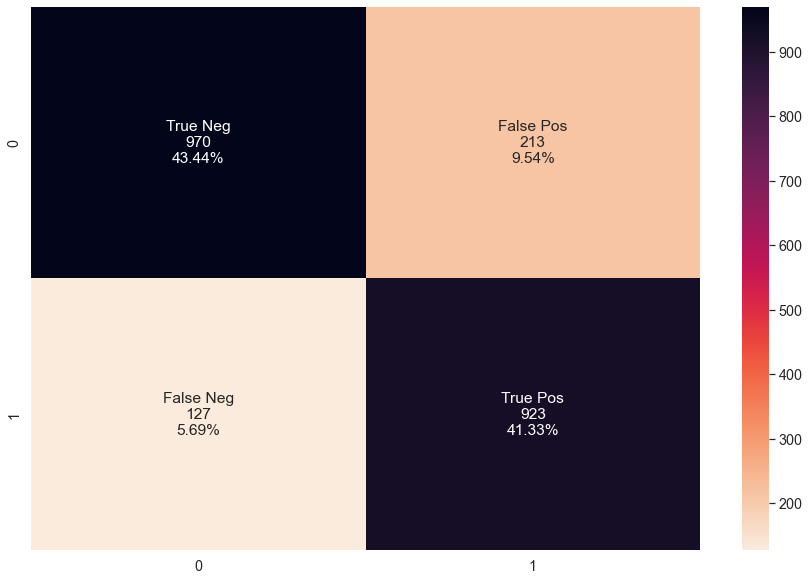

In [78]:
# Confusion Matrix 
cm = confusion_matrix(y_test, yPred_rf)

group_names = ['True Neg',"False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt="", cmap='rocket_r')
plt.show()

In [81]:
print("Model Accuracy Score : ",accuracy_score(y_test, yPred_rf))

Model Accuracy Score :  0.8477384684281236


**Precision**: It shows how many of the values we estimated as positive are actually positive. TP / (TP + FP)

In [94]:
print("Model Precision Score : ",precision_score(y_test, yPred_rf))

Model Precision Score :  0.8125


**Recall:** It is a metric that shows out of the actual total postives, how many are correctly predicted. TP / (TP+FN)

In [95]:
print("Model Recall Score : ",recall_score(y_test, yPred_rf))

Model Recall Score :  0.8790476190476191


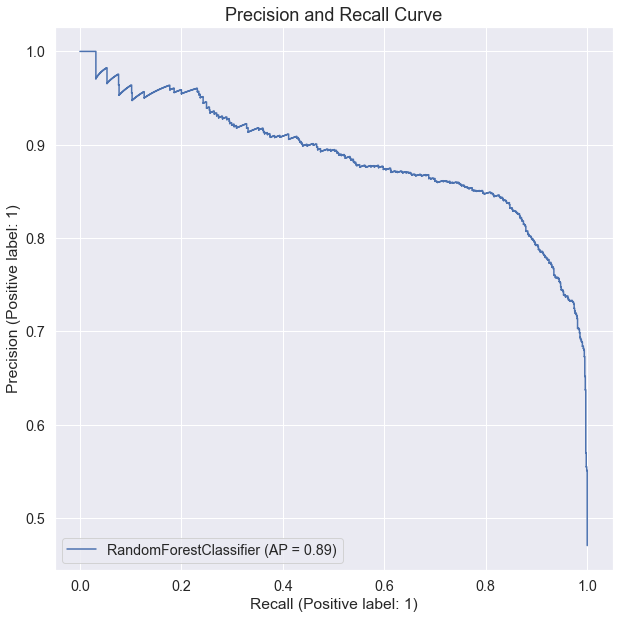

In [96]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.title("Precision and Recall Curve", fontsize=18)
plot_precision_recall_curve(rf,X_test[cols],y_test,ax=ax);

**F1 Score:** Shows the harmonic average of Precision and Recall values. 2 Precision Recall/(Precision * Recall)

In [97]:
print("Model F-1 Score : ",f1_score(y_test, yPred_rf))

Model F-1 Score :  0.8444647758462946


**Roc-Auc:** One of the most widely used metrics to evaluate the performance of machine learning algorithms in situations where unbalanced datasets exist. And it explains how good the model is at predicting.

In [108]:
print("Modelin ROC-AUC Score : ",roc_auc_score(y_test, yPred_rf))

Modelin ROC-AUC Score :  0.8494984502676811


In [101]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, yPred_rf)

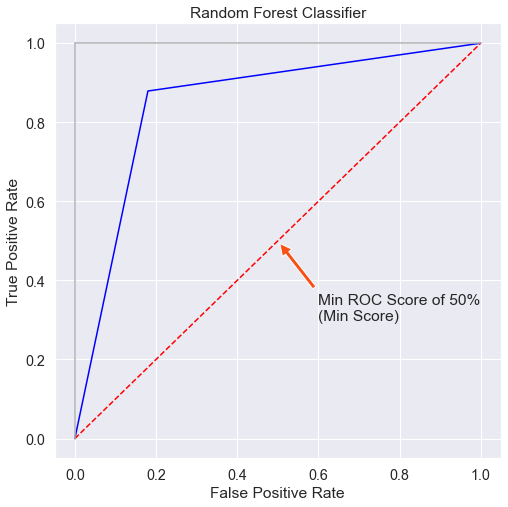

In [106]:
plt.subplots(1, figsize=(8,8))
plt.title('Random Forest Classifier')
plt.plot(false_positive_rate, true_positive_rate, color = 'blue')
plt.plot([0, 1], ls="--", color= 'red')
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.annotate('Min ROC Score of 50% \n(Min Score)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#F75118', shrink=0.05),
                )
plt.show()


#### We can say that 84.9% score is taken in the model, that is, the AUC area is 0.849 in size and it can classify so well.

### <font color= indigo> Importance of Model Inputs

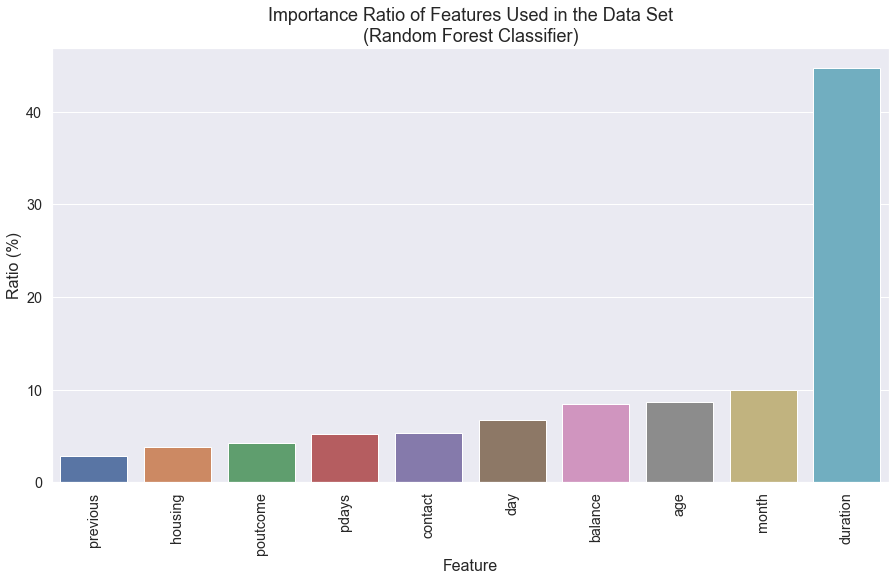

In [113]:
importances = rfmodel.feature_importances_
featureNames = cols
indices = np.argsort(importances)

fig, ax = plt.subplots(figsize=(15,8))
rotation = sns.barplot(featureNames[indices],
                       importances[indices]*100, 
                       ax=ax,
                       palette="deep")
for item in rotation.get_xticklabels():
    item.set_rotation(90)

plt.title("Importance Ratio of Features Used in the Data Set\n(Random Forest Classifier)", fontsize=18)
plt.xlabel("Feature", fontsize=16)
plt.ylabel("Ratio (%)", fontsize=16)
plt.show()

#### The three attributes most important to our classifier are Duration (how long the conversation takes between the salesperson and the potential customer), age (Customer's age), month (the last contact month of the year).

## <font color= steelblue>9. Results

1) **Marketing Activity Months:** We saw that the month with the highest marketing activity was May. However, this is the month when potential customers tend to reject time deposit offers (rejection rate: 33%). For the next marketing campaign, it would be wise for the bank to focus on the marketing campaign in March, September, October and December. (December should be taken into account as it is the month with the lowest marketing activity. There may be a reason why December is the lowest(110 customers).)

2) **Age Category:** Bank's next marketing campaign should target potential customers 25 or younger and 60 or older. Customers aged 25 and under have a 71% chance of subscribing to time deposits, while those aged 60 and over have an 82% chance of subscribing to time deposits. For the next campaign, it would be great if the bank could address these two categories, thereby increasing the possibility of demand for more time deposits.

3) **Job:** Potential customers who are students or retired were most likely to apply for time deposits. Retired individuals tend to have more time deposits to earn some cash through interest payments. Term deposits are short-term loans in which the person (in this case the retired person) agrees not to withdraw cash from the bank until a certain date agreed between the person and the financial institution. After this period, the person gets his capital back and gets the interest he made on the loan. Retired individuals tend not to spend a great deal of their cash, so they are more likely to put their money to work by lending it to the financial institution.

4) **Credit and Balance:** Potential customers in the low and zero balance category were more likely to get a home loan than customers in the medium and high balance category. What does it mean to get a home loan? This means that the potential customer has the financial privileges to repay the home loan and therefore has no cash to open in the time deposit account. However, we see that potential customers with average and high balances are less likely to use housing loans and therefore more likely to open time deposits. Finally, the next marketing campaign should focus on average and high-balance individuals to increase the likelihood of subscribing to time deposits.

5) **Campaign Calls:** To save time and effort in acquiring new leads, a policy should be implemented stating that a maximum of 3 calls should be applied to the same potential customer. Remember, the more we call the same prospect, the more likely he will refuse to open a time deposit.

6) **Customers with more than average call time (over 372) should be targeted:** The probability of opening a time deposit account for this group is quite high with 77%. It ensures that the success rate of the next marketing campaign is quite successful.
